In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

## Q1 

### Generate sample points from 4 artificially generated clusters and save the points in a .npy file. Here is an example of some artificially generated data (provided with this coding assignment):

In [2]:
np.random.seed(10)
low_bound=5.0
high_bound=15.0
n_clusters = 4
sample_size = 30
file_path = './data.npy'
# we create four random data points as the center of each cluster.
data_pints_x_axis = np.random.uniform(low=low_bound, high=high_bound, size=(n_clusters,))
data_pints_y_axis = np.random.uniform(low=low_bound, high=high_bound, size=(n_clusters,))
data_points = np.array((data_pints_x_axis, data_pints_y_axis)).T.reshape(-1, 2)

population = None
# generate random samples in the vicinity of each cluster.
for i, point in enumerate(data_points):
    x = np.random.normal(loc=point[0], size=sample_size, scale=0.3)
    y = np.random.normal(loc=point[1], size=sample_size, scale=0.3)
    stack_points = np.stack((x, y), axis=1)
    if population is None:
        population = stack_points
    else:
        population = np.concatenate((population, stack_points))
# save the populated data points in a numpy data file at the given path.
np.save(file_path, population)

## Q2 

### Plot the 4 clusters in a single figure

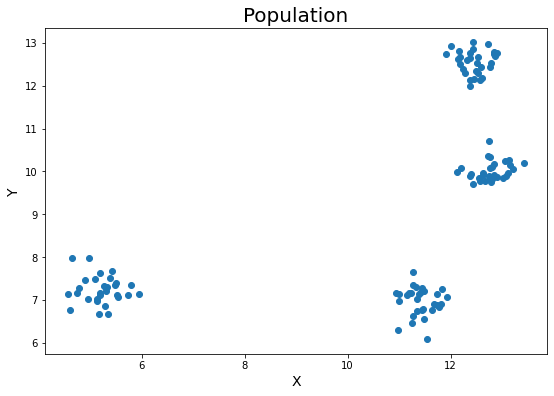

In [3]:
data = np.load(file_path)
plt.figure(figsize=(9, 6))
plt.title('Population', fontsize=20)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()

## Q3

### Cluster the data you artificially generated using the DBscan algorithm from scikit-learn. Plot the resulting clusters in one single figure.

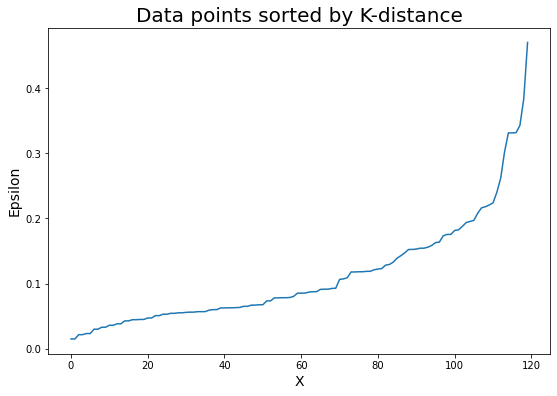

In [4]:
data = np.load(file_path)
nn_model = NearestNeighbors(n_neighbors=2)
nn_out = nn_model.fit(data)
distances, indices = nn_out.kneighbors(data)
# plotting the Data points sorted by K-distance
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.figure(figsize=(9, 6))
plt.plot(distances)
plt.title('Data points sorted by K-distance', fontsize=20)
plt.xlabel('X', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.show()

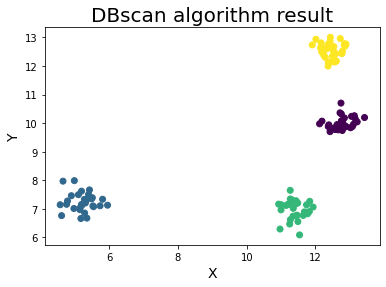

In [15]:
min_samples=3
epsilon= 0.49
data = np.load(file_path)
# Model training.
dbscan_model = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan_model.fit_predict(data)
# clusters visualization.
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap="viridis")
plt.title('DBscan algorithm result', fontsize=20)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
pyplot.show()

## Q4 

#### Apply DBscan over the data provided with the test. Plot the resulting clusters in one single figure.

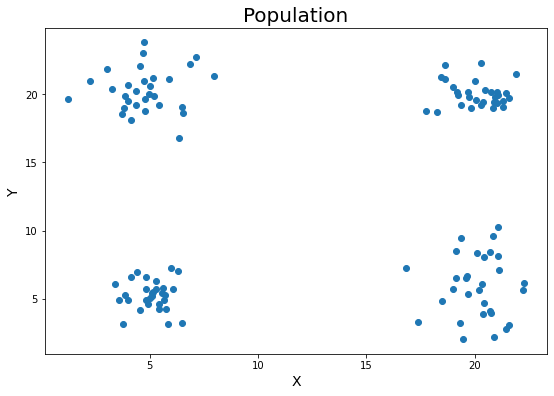

In [16]:
test_file_path = './sample_data.npy'
data = np.load(test_file_path)
plt.figure(figsize=(9, 6))
plt.title('Population', fontsize=20)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()

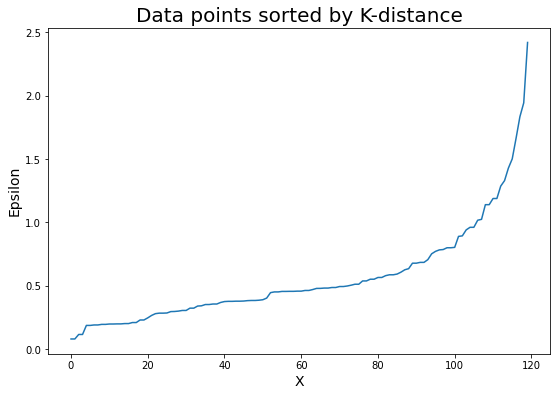

In [18]:
data = np.load(test_file_path)
nn_model = NearestNeighbors(n_neighbors=2)
nn_out = nn_model.fit(data)
distances, indices = nn_out.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.figure(figsize=(9, 6))
plt.plot(distances)
plt.title('Data points sorted by K-distance', fontsize=20)
plt.xlabel('X', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.show()

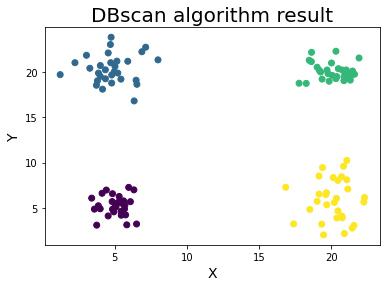

In [19]:
min_samples=3
epsilon= 2.5
data = np.load(test_file_path)
# Model training.
dbscan_model = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan_model.fit_predict(data)
# clusters visualization.
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap="viridis")
plt.title('DBscan algorithm result', fontsize=20)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
pyplot.show()

## Q4-A 

#### If some points are not clustered, or clustered in the wrong cluster for either the data you generated, or the data provided, give a few insights about why does this happen?

## Q4_B 

#### Is DBscan a good choice for solving this clustering problem and why?

## Q4_C 

#### If the clustering is not perfect for the data provided with the test, what would you change to get better clustering performance?

## Q4_D 

#### To which class of machine learning algorithms does DBscan (and clustering algorithms at large) belong and why?